### Name: Ambreen Abdul Raheem
### Teacher: Sir Sajid Majeed
### Subject: Machine Learning
### Program: Data Science with Artificial Intelligence
### Github:https://github.com/ambreenraheem?tab=overview&from=2024-09-01&to=2024-09-30
### Email: ambreen.a.raheem@outlook.com
### LinkedIn: https://www.linkedin.com/in/ambreen-abdul-raheem-122509300/


## The Decision Tree Algorithm


<p>A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in a recursive manner called recursive partitioning. This flowchart-like structure helps you in decision-making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

</p>

![](decision_tree.png)

### How Does the Decision Tree Algorithm Work?


1-Select the best attribute using Attribute Selection Measures (ASM) to split the records.

2-Make that attribute a decision node and breaks the dataset into smaller subsets.

3-Start tree building by repeating this process recursively for each child until one of the conditions will match:

    -All the tuples belong to the same attribute value.
    -There are no more remaining attributes.
    -There are no more instances.

![](ALGO.PNG)

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Feature Selection


In [6]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = df[feature_cols] # Features
y = df['Outcome'] # Target variable

In [7]:
X

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288
...,...,...,...,...,...,...,...
763,10,180,32.9,63,101,76,0.171
764,2,0,36.8,27,122,70,0.340
765,5,112,26.2,30,121,72,0.245
766,1,0,30.1,47,126,60,0.349


In [8]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Splitting Data


In [9]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [10]:
X_train

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
88,15,110,37.1,43,136,70,0.153
467,0,100,36.8,25,97,64,0.600
550,1,0,27.4,21,116,70,0.204
147,2,119,30.5,34,106,64,1.400
481,0,0,35.2,29,123,88,0.197
...,...,...,...,...,...,...,...
645,2,440,39.4,30,157,74,0.134
715,7,392,33.9,34,187,50,0.826
72,13,0,43.4,42,126,90,0.583
235,4,0,43.6,26,171,72,0.479


In [11]:
X_train.shape

(537, 7)

In [12]:
X_test

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
285,7,135,26.0,51,136,74,0.647
101,1,0,26.1,22,151,60,0.179
581,6,0,25.0,27,109,60,0.206
352,3,0,34.4,46,61,82,0.243
726,1,180,36.1,25,116,78,0.496
...,...,...,...,...,...,...,...
241,4,88,33.1,22,91,70,0.446
599,1,120,23.1,26,109,38,0.407
650,1,100,25.2,23,91,54,0.234
11,10,0,38.0,34,168,74,0.537


In [13]:
y_test

285    0
101    0
581    0
352    0
726    0
      ..
241    0
599    0
650    0
11     1
214    1
Name: Outcome, Length: 231, dtype: int64

### Building Decision Tree Model

In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


### Evaluating the Model


In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753246753246753


In [16]:
%pip install graphviz
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


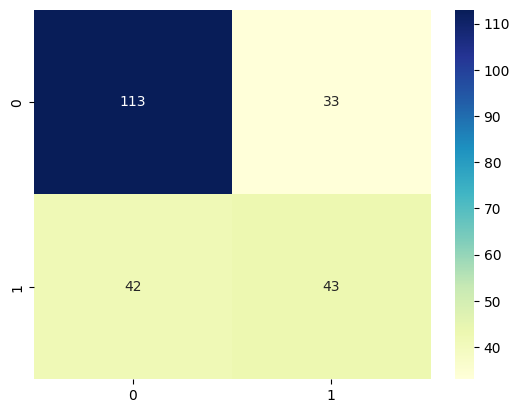

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Visualizing Decision Trees


In [18]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [19]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

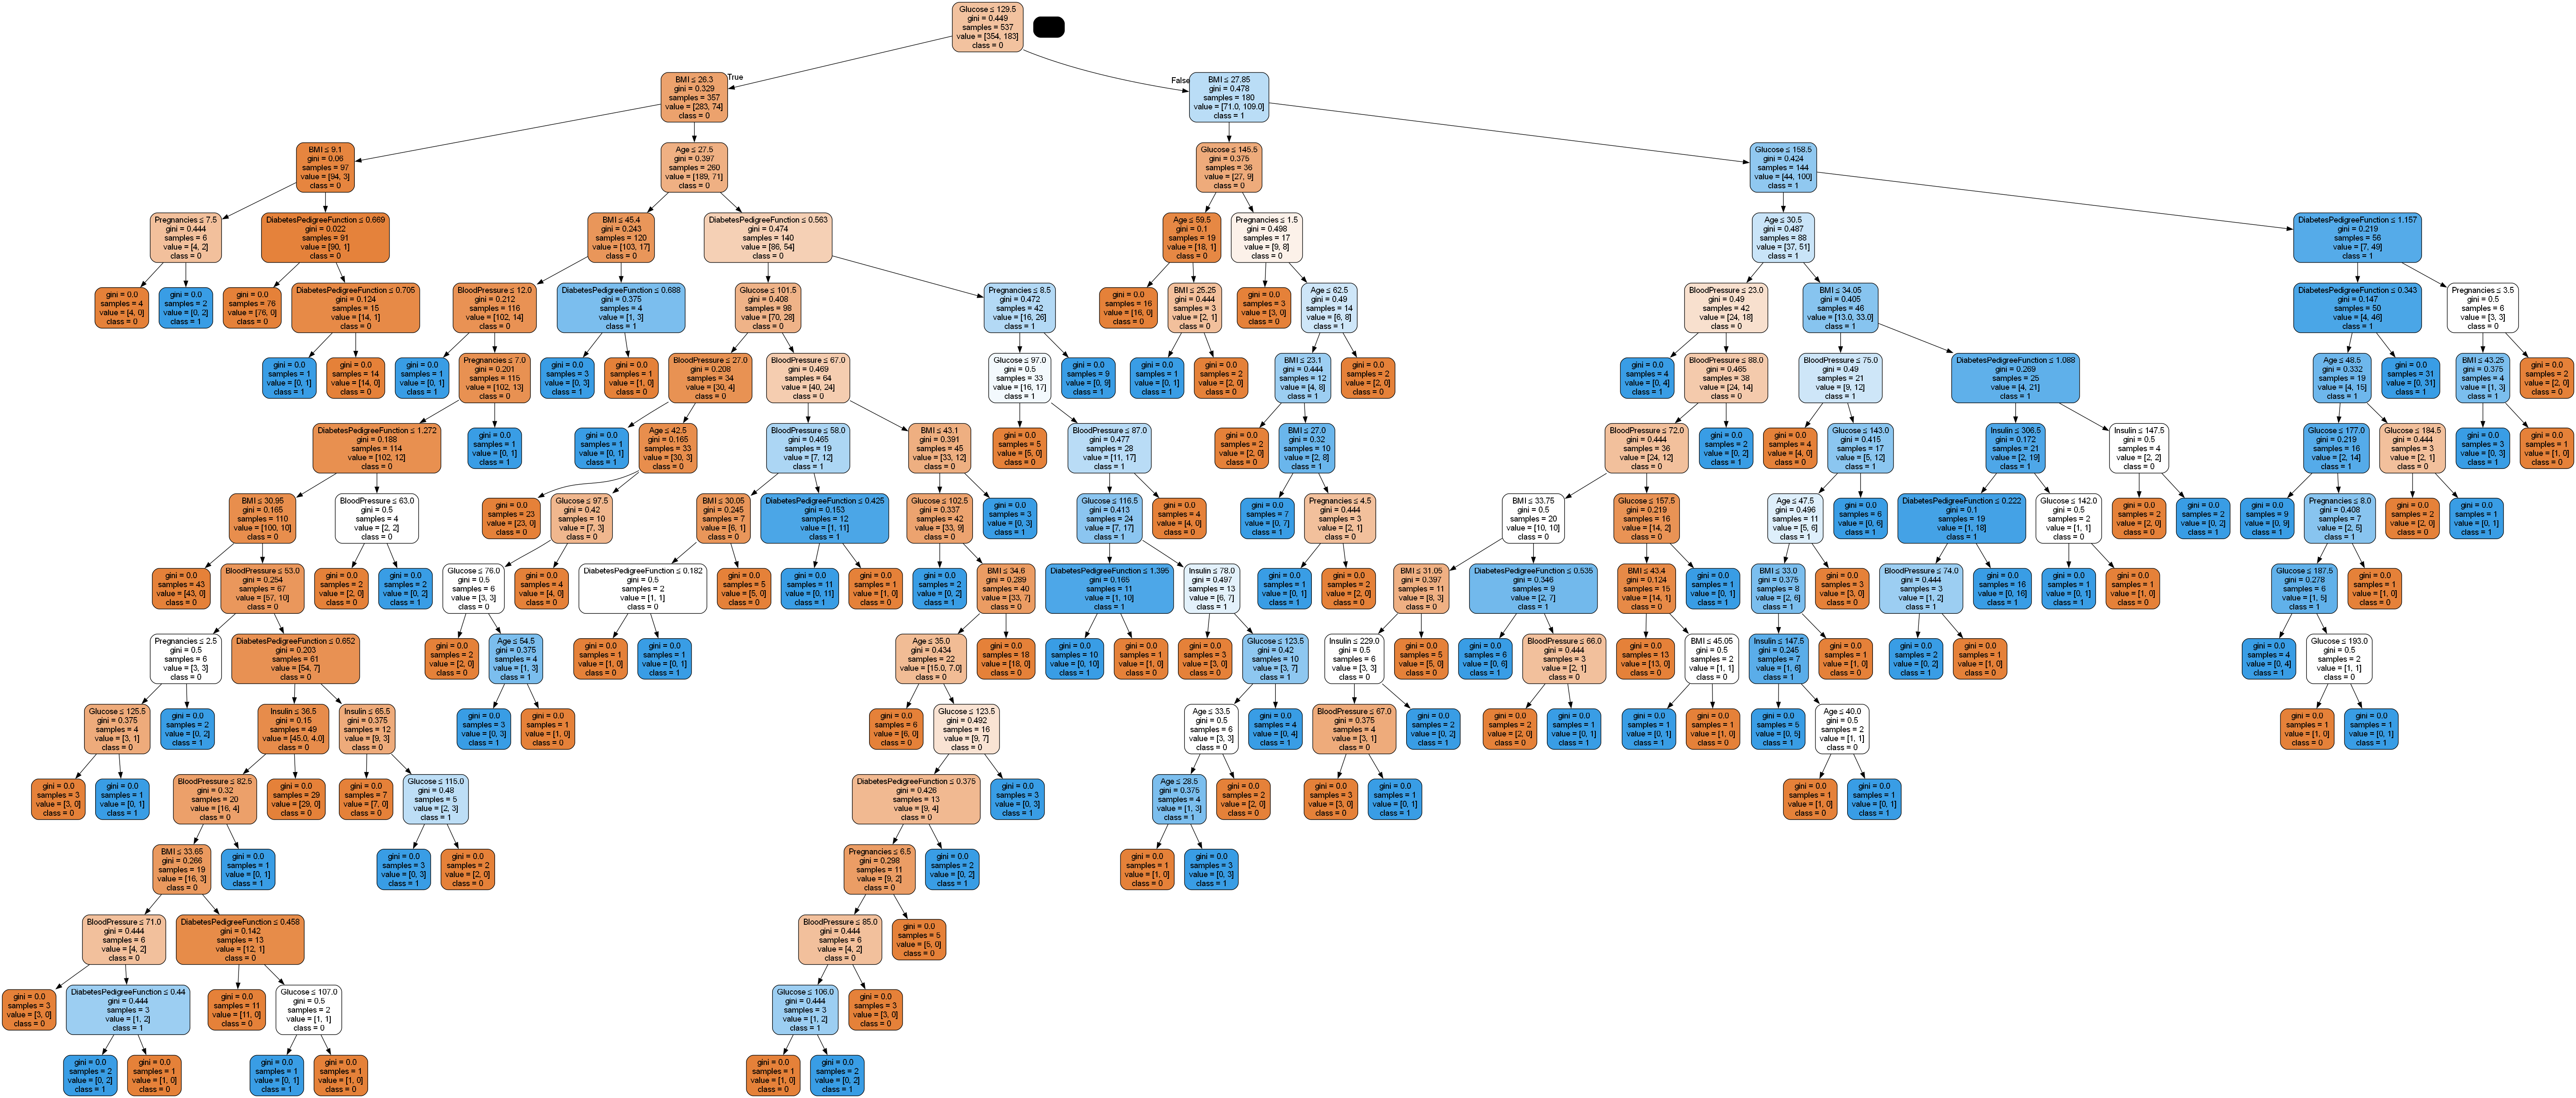

In [27]:
import os
import graphviz
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Set the path to the Graphviz executables
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

# Create a Graphviz object
dot = graphviz.Source(dot_data.getvalue())

# Render and save the graph as a PNG file
dot.render("diabetes", format="png", cleanup=True)
Image(graph.create_png())

### Optimizing Decision Tree Performance


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


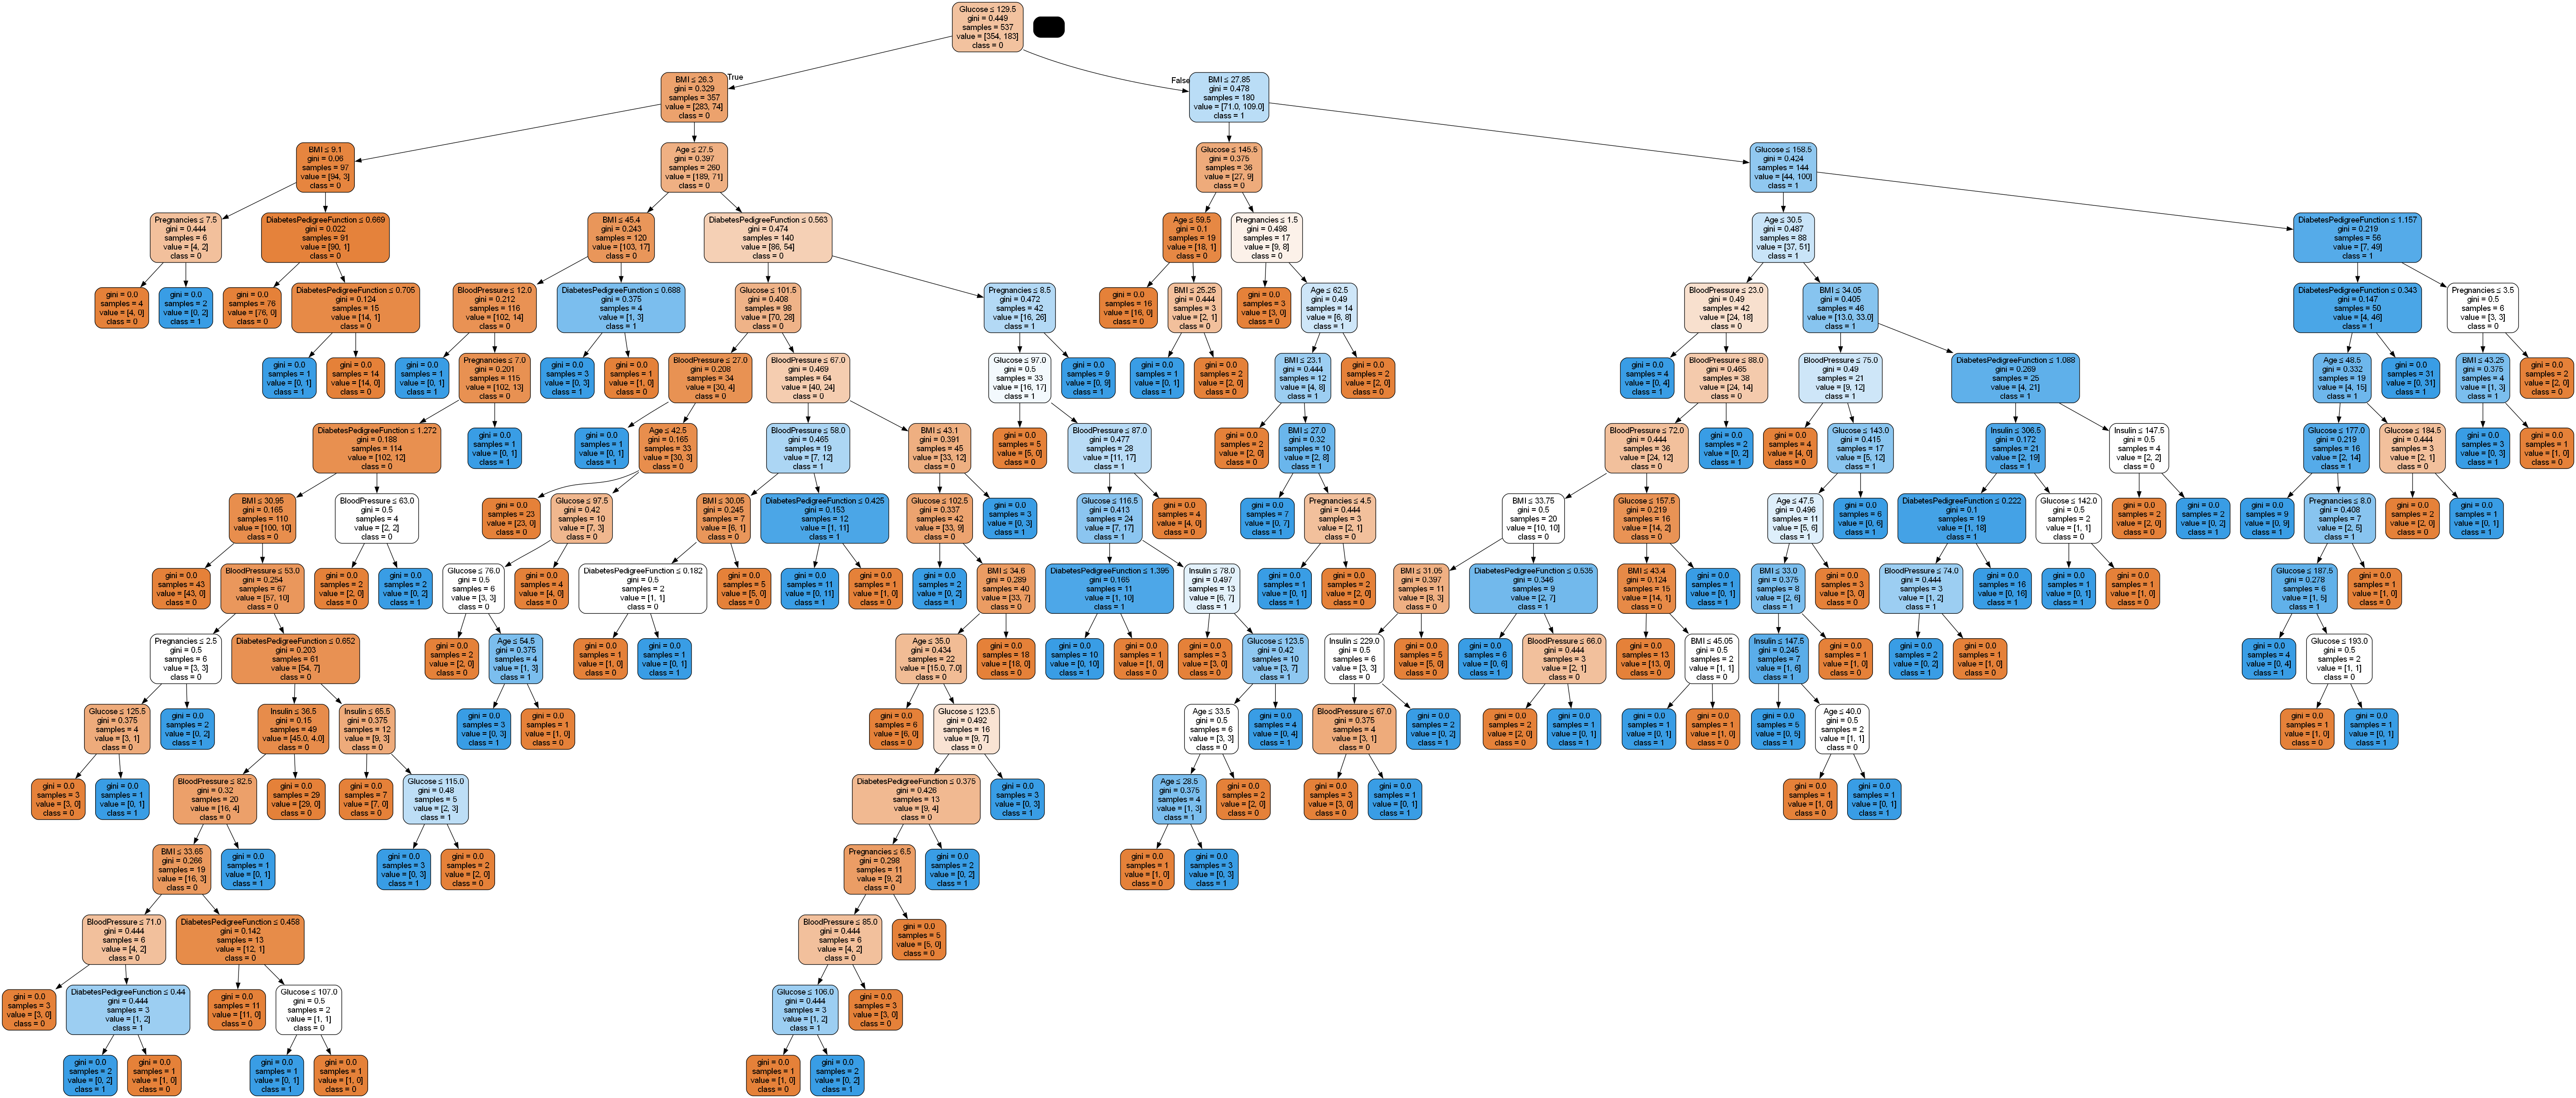

In [29]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [22]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  0.6753246753246753
Recall Score:  0.5058823529411764
Precision Score:  0.5657894736842105
F1 Score:  0.5341614906832298
Confusion Matrix: 
 [[113  33]
 [ 42  43]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       146
           1       0.57      0.51      0.53        85

    accuracy                           0.68       231
   macro avg       0.65      0.64      0.64       231
weighted avg       0.67      0.68      0.67       231



Text(95.72222222222221, 0.5, 'Actual')

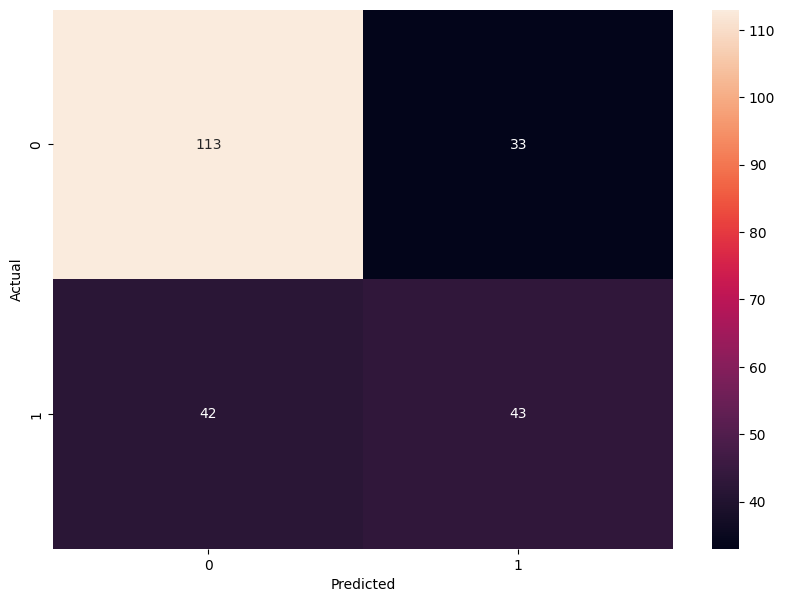

In [23]:
# plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')